# This is a stock price predictor for any stock.
## By Niam Bashambu

In [51]:
#doing imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from pandas_datareader import data
import time


In [ ]:
tickers = 'NVDA'

start_date = '2020-01-01'
end_date = '2025-01-01'

stock_data = yf.download(tickers, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [53]:
#Print data
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2014-01-02,0.373966,0.376796,0.370665,0.375381,260092000
2014-01-03,0.369486,0.375381,0.368307,0.374674,259332000
2014-01-06,0.374438,0.377267,0.369722,0.373259,409492000
2014-01-07,0.380568,0.381983,0.375617,0.378210,333288000
2014-01-08,0.385756,0.387642,0.380568,0.381983,308192000
2014-01-09,0.371373,0.380568,0.370194,0.379861,292172000
2014-01-10,0.370901,0.375145,0.367600,0.372552,218492000
2014-01-13,0.362177,0.373259,0.361469,0.370901,243332000


In [54]:
stock_data.reset_index(inplace=True)
stock_data.dropna(inplace=True)
stock_data

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2014-01-02,0.373966,0.376796,0.370665,0.375381,260092000
1,2014-01-03,0.369486,0.375381,0.368307,0.374674,259332000
2,2014-01-06,0.374438,0.377267,0.369722,0.373259,409492000
3,2014-01-07,0.380568,0.381983,0.375617,0.378210,333288000
4,2014-01-08,0.385756,0.387642,0.380568,0.381983,308192000
...,...,...,...,...,...,...
2776,2025-01-15,136.240005,136.449997,131.289993,133.649994,185217300
2777,2025-01-16,133.570007,138.750000,133.490005,138.639999,209235600
2778,2025-01-17,137.710007,138.500000,135.460007,136.690002,201188800


In [55]:
stock_data.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
count,2781,2781.000000,2781.000000,2781.000000,2781.000000,2.781000e+03
mean,2019-07-11 10:23:56.893203712,19.499545,19.855468,19.114425,19.504559,4.498624e+08
min,2014-01-02 00:00:00,0.362177,0.365949,0.361233,0.363827,4.564400e+07
25%,2016-10-05 00:00:00,1.636683,1.643816,1.618973,1.636191,2.896800e+08
50%,2019-07-12 00:00:00,5.979930,6.078150,5.885078,5.985591,3.978650e+08
75%,2022-04-13 00:00:00,19.562803,19.915278,19.136081,19.603532,5.424440e+08
max,2025-01-22 00:00:00,149.429993,153.130005,147.820007,153.029999,3.692928e+09
std,NaN,32.349270,32.957631,31.711176,32.394290,2.502842e+08


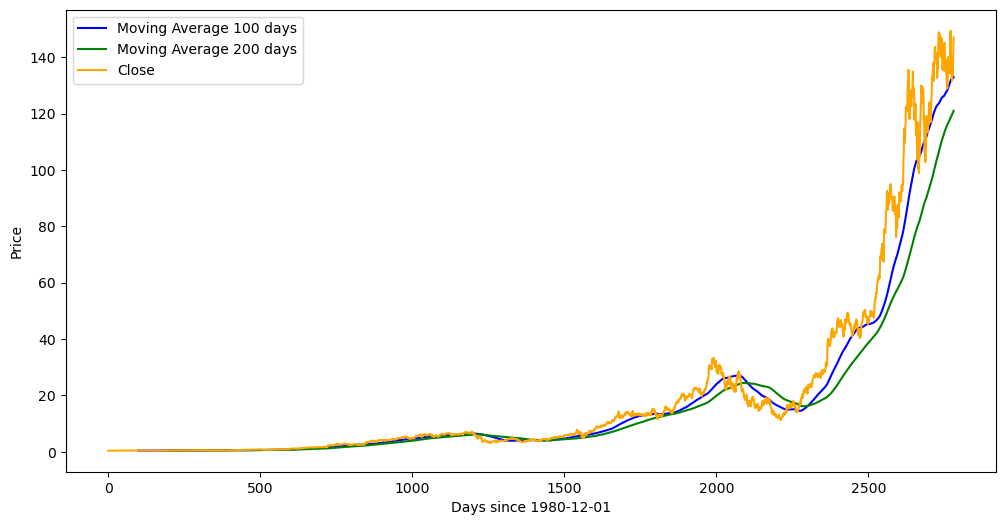

In [ ]:
#Plotting the data and the moving averages
avg1 = stock_data['Close'].rolling(100).mean()
avg2 = stock_data['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(avg1, 'blue', label='Moving Average 100 days')
plt.plot(avg2, 'green', label='Moving Average 200 days')
plt.plot(stock_data['Close'], 'orange', label='Close')
plt.legend(loc='upper left')
plt.xlabel('Days since 2020-12-01')
plt.ylabel('Price')
plt.show()

In [57]:
train, test = train_test_split(stock_data['Close'], test_size=0.2, shuffle=False)



In [58]:
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train.values.reshape(-1,1))


In [59]:
x = []
y = []

for i in range(100, train_scaled.shape[0]):
    x.append(train_scaled[i-100:i])
    y.append(train_scaled[i, 0])
    
x, y = np.array(x), np.array(y)

In [60]:
model = Sequential()

model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/Users/niambashambu/anaconda3/envs/ds/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [62]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0365
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0048
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0048
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0039
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0031
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0033
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0035
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0031
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0032
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0033
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0030
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0030
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0033
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0027
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0025

In [63]:

past_100_days = train.tail(100)
data_test = pd.concat((past_100_days, test), ignore_index=True)

data_test_scaled = scaler.fit_transform(data_test.values.reshape(-1,1))

In [64]:
x = []
y = []

for i in range(100, data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i, 0])
    
x, y = np.array(x), np.array(y)

In [65]:
y_predict = model.predict(x)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [66]:
scale = 1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

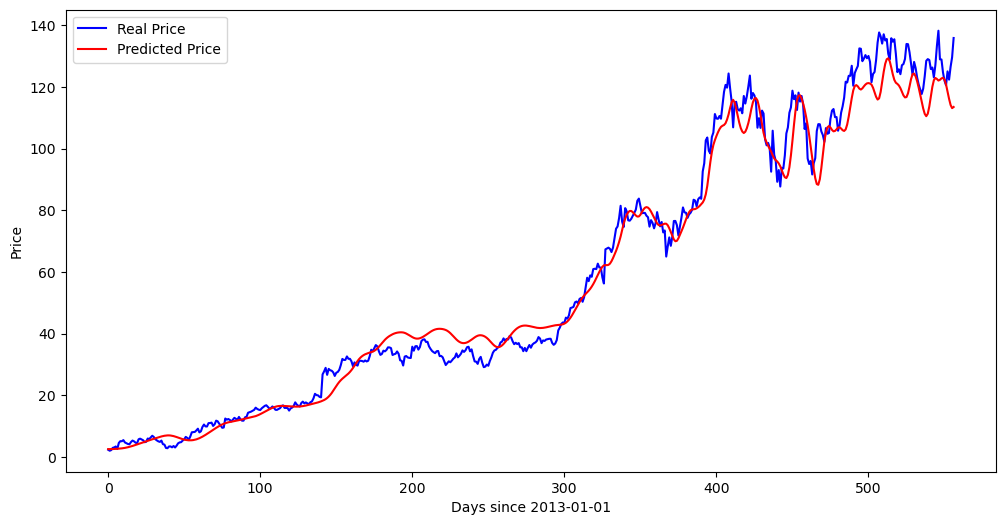

In [67]:
plt.figure(figsize=(12,6))
plt.plot(y, 'b', label='Real Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel('Days since 2013-01-01')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()